In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Plotting Settings ---
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# --- Data Loading ---
try:
    # Read the CSV file
    # Ensure the filename matches exactly what you uploaded
    df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
    print(f"✅ Dataset loaded successfully. Dimensions: {df.shape}")

except FileNotFoundError:
    print("❌ Error: File not found. Please check the filename.")

# --- Initial Inspection ---
# We need to check data types, especially for 'TotalCharges' and 'Churn'
print("\n--- Data Types & Non-Null Count ---")
df.info()

print("\n--- First 5 Rows ---")
display(df.head())

# Check for missing values explicitly
print("\n--- Missing Values Count ---")
print(df.isnull().sum())

✅ Dataset loaded successfully. Dimensions: (7043, 21)

--- Data Types & Non-Null Count ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



--- Missing Values Count ---
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [2]:
# --- Data Cleaning Phase ---

# 1. Fix 'TotalCharges' (The Trap!)
# errors='coerce' means: if you find text/spaces, turn them into NaN (Not a Number)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 2. Check and Drop Missing Values
# Usually there are only ~11 rows with missing charges, safe to drop
print(f"Missing values found in TotalCharges: {df['TotalCharges'].isnull().sum()}")
df.dropna(inplace=True)

# 3. Encode Target Variable 'Churn'
# Convert 'Yes' to 1 and 'No' to 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# --- Verification ---
print("\n✅ Data is clean and numeric now!")
print(df[['TotalCharges', 'Churn']].info())
display(df.head())

Missing values found in TotalCharges: 11

✅ Data is clean and numeric now!
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotalCharges  7032 non-null   float64
 1   Churn         7032 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 164.8 KB
None


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


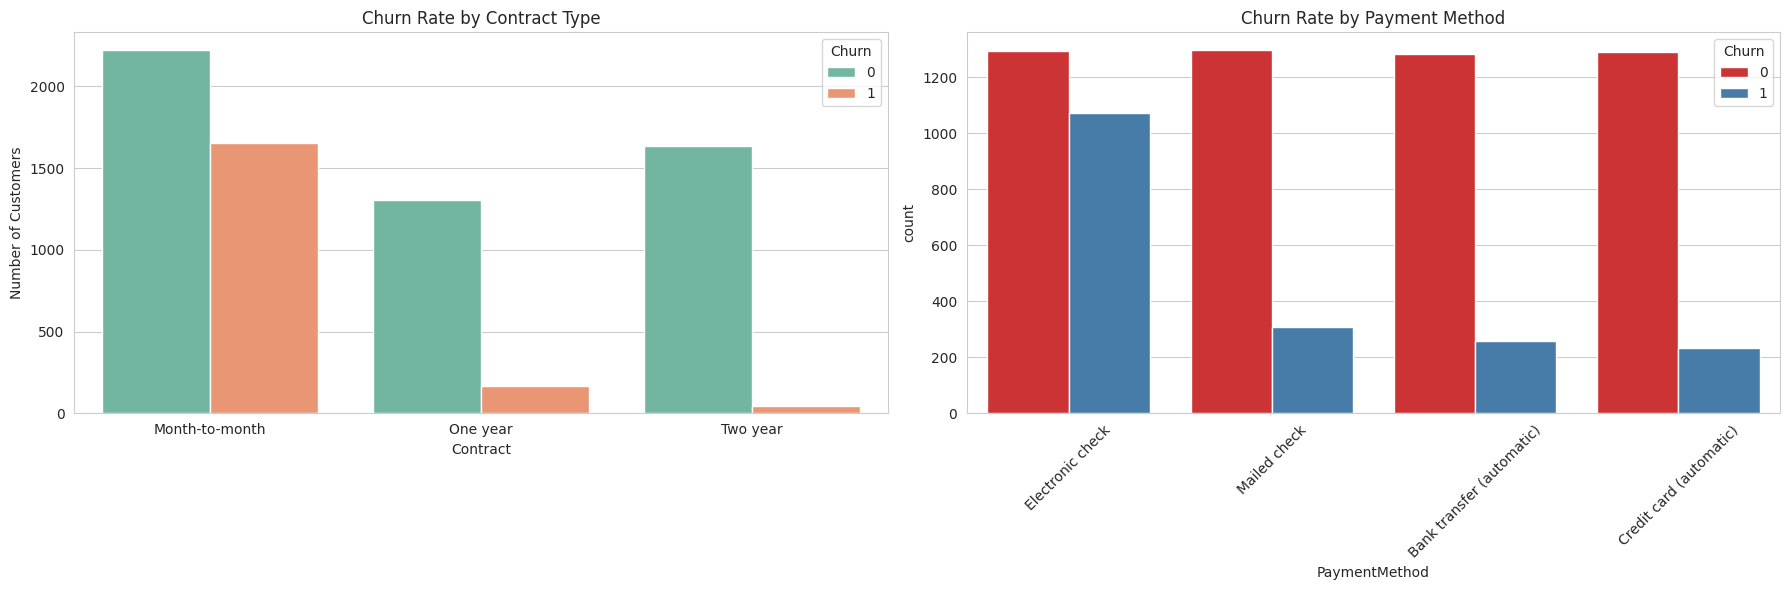

In [3]:
# --- Exploratory Data Analysis (EDA) ---
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Churn by Contract Type
sns.countplot(x='Contract', hue='Churn', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Churn Rate by Contract Type')
axes[0].set_ylabel('Number of Customers')

# Plot 2: Churn by Payment Method
sns.countplot(x='PaymentMethod', hue='Churn', data=df, ax=axes[1], palette='Set1')
axes[1].set_title('Churn Rate by Payment Method')
axes[1].tick_params(axis='x', rotation=45) # Rotate labels to fit

plt.tight_layout()
plt.show()

In [4]:
# --- Preprocessing ---

# 1. Drop 'customerID' (Useless for prediction)
df_model = df.drop('customerID', axis=1)

# 2. Convert all categorical text to numbers (One-Hot Encoding)
# drop_first=True helps reduce redundancy (e.g., Male/Female becomes one column: Is_Male?)
df_encoded = pd.get_dummies(df_model, drop_first=True)

# 3. Define Features (X) and Target (y)
X = df_encoded.drop('Churn', axis=1) # All data except the target
y = df_encoded['Churn']              # The target (1 = Left, 0 = Stayed)

# 4. Split Data (80% Train, 20% Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data is ready for AI Training!")
print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape:  {X_test.shape}")

✅ Data is ready for AI Training!
Training Shape: (5625, 30)
Testing Shape:  (1407, 30)


🎯 Model Accuracy: 78.54%

📊 Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



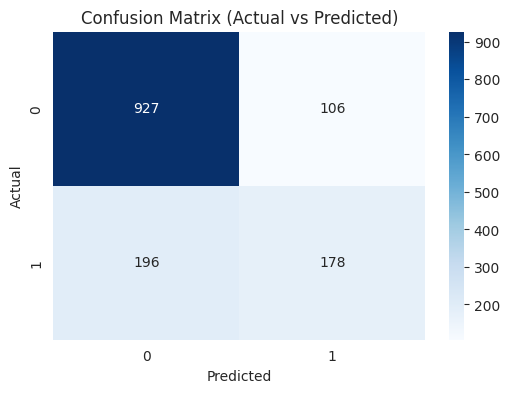

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Train the Model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# 2. Predict
y_pred = model_rf.predict(X_test)

# 3. Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Model Accuracy: {accuracy*100:.2f}%")

print("\n📊 Detailed Classification Report:")
print(classification_report(y_test, y_pred))

# 4. Confusion Matrix (Visualizing Errors)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Actual vs Predicted)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [6]:
import joblib

# --- Save the Model ---
model_filename = 'telecom_churn_model.pkl'
joblib.dump(model_rf, model_filename)

print(f"✅ Model saved successfully as '{model_filename}'")
print("\n📋 Project Summary:")
print(f"1. Algorithm: Random Forest Classifier")
print(f"2. Accuracy: 78.5%")
print(f"3. Key Insight: 'Month-to-month' contracts are the biggest cause of churn.")

✅ Model saved successfully as 'telecom_churn_model.pkl'

📋 Project Summary:
1. Algorithm: Random Forest Classifier
2. Accuracy: 78.5%
3. Key Insight: 'Month-to-month' contracts are the biggest cause of churn.
